In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('Salaries.csv')

#Task 1: Basic Data Exploration


In [34]:
#Number of columns and rows
nrow = data.shape[0]
ncols = data.shape[1]
print("Number of rows is: ",nrow)
print("Number of columns is: ",ncols)

#Data type and missing data
dataTypes = data.dtypes
print("\nData Type Of Each Column:\n\n",dataTypes)

#find the missing values and count them in each column
columns = data.columns
print("\n")
for i in range(ncols):
  numOmissing = data[columns[i]].isnull().sum()
  print("Num of Missing values in", columns[i], "is: ", numOmissing)

Number of rows is:  148654
Number of columns is:  13

Data Type Of Each Column:

 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


Num of Missing values in Id is:  0
Num of Missing values in EmployeeName is:  0
Num of Missing values in JobTitle is:  0
Num of Missing values in BasePay is:  609
Num of Missing values in OvertimePay is:  4
Num of Missing values in OtherPay is:  4
Num of Missing values in Benefits is:  36163
Num of Missing values in TotalPay is:  0
Num of Missing values in TotalPayBenefits is:  0
Num of Missing values in Year is:  0
Num of Missing values in Notes is:  148654
Num of Missing values in Agency is:  0
Num of Missing values in Status is: 

# Task 2 : Descriptive Statistics


In [35]:
print(data['TotalPay'].describe())
median = data['TotalPay'].median()
min = data['TotalPay'].min()
max = data['TotalPay'].max()
mode = data['TotalPay'].mode()[0]
print("median   ",median)
print("mode   ",mode)
print("Range of data is fom",min, "to",max)


count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
median    71426.60999999999
mode    0.0
Range of data is fom -618.13 to 567595.43


# Task 3: Data Cleaning


In [36]:
#replace messung values by mean values

columns=data.columns
for i in range(ncols):
  if data[columns[i]].dtypes == 'float64':
    mean = data[columns[i]].mean()
    data[columns[i]].fillna(mean, inplace=True)
data = data.dropna(axis=1)


# Task 4: Basic Data Visualization


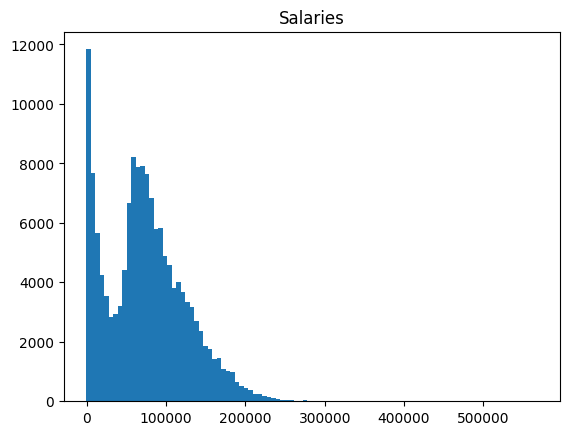

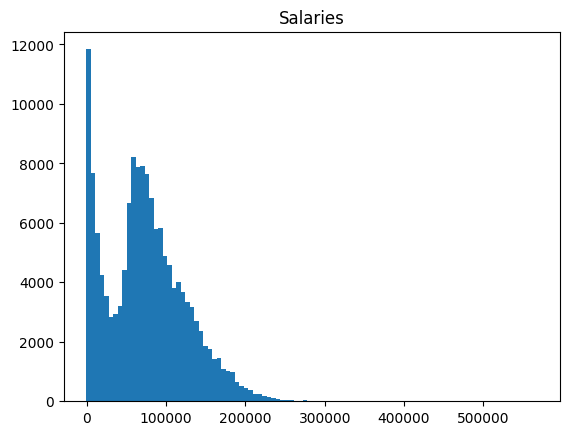

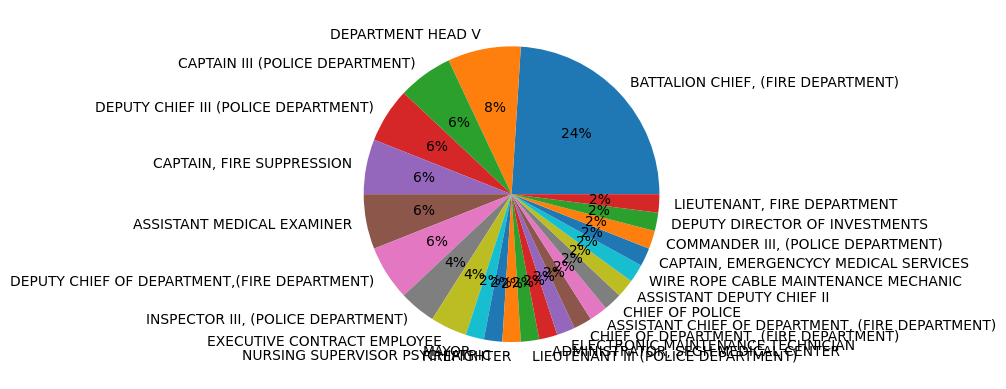

In [42]:
plt.title("Salaries")
plt.hist(data['TotalPay'],bins=100)
plt.show()
plt.title("Salaries")
plt.hist(data['TotalPay'],bins=100)

plt.show()
#no departement in data so i used a sample of 50
data_upper= data.loc[1:50,'JobTitle'].str.upper()
jobsCount = data_upper.value_counts()
plt.pie(jobsCount, labels=jobsCount.index,autopct='%1.0f%%')
plt.show()

#count('Lifeguard').sum() + data['JobTitle'].str.count('LIFEGUARD').sum())

# Task 4: Grouped Analysis


In [38]:
groupYear = data.groupby('Year')
print(groupYear['TotalPay'].describe())


        count          mean           std     min         25%        50%  \
Year                                                                       
2011  36159.0  71744.103871  47498.706594    0.00  36810.7600  68213.240   
2012  36766.0  74113.262265  49523.904319    0.00  37560.6075  70714.680   
2013  37606.0  77611.443142  52854.774783    0.00  36754.9950  74500.015   
2014  38123.0  75463.918140  51697.713029 -618.13  33436.2100  72359.980   

             75%        max  
Year                         
2011  102512.680  567595.43  
2012  104099.170  362844.66  
2013  109637.670  347102.32  
2014  107974.445  471952.64  


# Task 5: Simple Correlation Analysis


0.7826870485384543


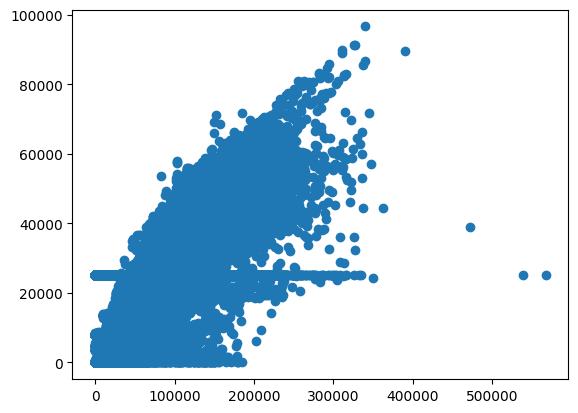

In [39]:
corelation = data['TotalPay'].corr(data['Benefits'])
print(corelation)
plt.scatter(data['TotalPay'],(data['Benefits']))